In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../datasets/CSJReal5')

In [19]:
df.head()

,x,y,mouseDown,keyDown,timestamp
0,581,1016,0,0,1
1,581,1016,0,1,51
2,577,1011,0,0,517
3,569,997,0,0,523
4,557,975,0,0,531


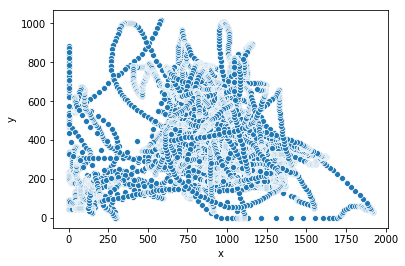

In [20]:
sns.scatterplot(x='x', y='y', data=df)

In [21]:
df['stroke'] = list(pd.qcut(df['timestamp'], len(df)//30, labels=np.arange(0, len(df)//30)))
df['stroke'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

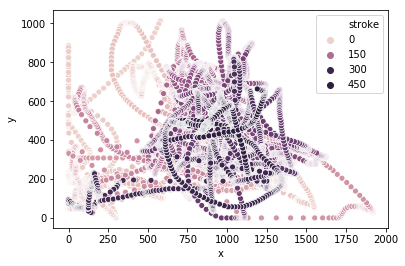

In [22]:
sns.scatterplot(x='x', y='y', hue='stroke', data=df)

In [23]:
df.head()

,x,y,mouseDown,keyDown,timestamp,stroke
0,581,1016,0,0,1,0
1,581,1016,0,1,51,0
2,577,1011,0,0,517,0
3,569,997,0,0,523,0
4,557,975,0,0,531,0


In [24]:
distX = df.loc[:, 'x'].diff()
distX[0] = 0
distY = df.loc[:, 'y'].diff()
distY[0] = 0
distTime = df.loc[:, 'timestamp'].diff()
distTime[0] = 0
df['distance'] = np.sqrt(np.square(distX) + np.square(distY))
df['velocity'] = df['distance']/distTime
df.loc[0, 'velocity'] = 0
df.head(10)

,x,y,mouseDown,keyDown,timestamp,stroke,distance,velocity
0,581,1016,0,0,1,0,0.000000,0.000000
1,581,1016,0,1,51,0,0.000000,0.000000
2,577,1011,0,0,517,0,6.403124,0.013741
3,569,997,0,0,523,0,16.124515,2.687419
4,557,975,0,0,531,0,25.059928,3.132491
5,543,951,0,0,540,0,27.784888,3.087210
6,527,927,0,0,548,0,28.844410,3.605551
7,507,899,0,0,556,0,34.409301,4.301163
8,485,869,0,0,564,0,37.202150,4.650269
9,461,843,0,0,571,0,35.383612,5.054802


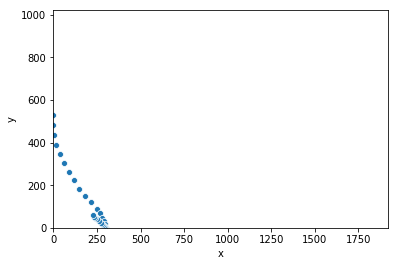

In [25]:
plt.ylim(0, 1020)
plt.xlim(0, 1920)
sns.scatterplot(x='x', y='y', data=df[df['stroke'] == 6])

In [26]:
def get_direction(x1, y1, x2, y2):
    
    deg = math.degrees(np.arctan2(x2-x1,y2-y1))
    
    if(np.arctan2(x2-x1,y2-y1) < 0):
        deg+=360
    
    if(deg >= 22.5 and deg < 67.5):
        return 2
    elif(deg >= 67.5 and deg < 112.5):
        return 3
    elif(deg >= 112.5 and deg < 157.5):
        return 4
    elif(deg >= 157.5 and deg < 202.5):
        return 5
    elif(deg >= 202.5 and deg < 247.5):
        return 6
    elif(deg >= 247.5 and deg < 292.5):
        return 7
    elif(deg >= 292.5 and deg < 337.5):
        return 8
    elif(deg >= 337.5 or deg < 22.5):
        return 1


In [27]:
basic = ['Count']
velocityList = ['Velocity_Total', 'Velocity_Min', 'Velocity_Max', 'Velocity_STD', 'Velocity_Mean', 'Velocity_Median']
mouseClickList = ['MouseClick_Total', 'MouseClick_Min', 'MouseClick_Max', 'MouseClick_STD', 'MouseClick_Mean', 'MouseClick_Median']
keyboardClickList = ['KeyboardClick_Total', 'KeyboardClick_Min', 'KeyboardClick_Max', 'KeyboardClick_STD', 'KeyboardClick_Mean', 'KeyboardClick_Median']
columns = basic+velocityList+mouseClickList+keyboardClickList
TrainingData = pd.DataFrame(columns=columns, index=list(np.arange(1, 9)))

In [28]:
TrainingData

,Count,Velocity_Total,Velocity_Min,Velocity_Max,Velocity_STD,Velocity_Mean,Velocity_Median,MouseClick_Total,MouseClick_Min,MouseClick_Max,MouseClick_STD,MouseClick_Mean,MouseClick_Median,KeyboardClick_Total,KeyboardClick_Min,KeyboardClick_Max,KeyboardClick_STD,KeyboardClick_Mean,KeyboardClick_Median
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df['direction'] = -1
for x in df['stroke'].unique():
    direction = get_direction(int(df[df['stroke'] == x].head(1)['x']),
            int(df[df['stroke'] == x].head(1)['y']),
            int(df[df['stroke'] == x].tail(1)['x']),
            int(df[df['stroke'] == x].tail(1)['y'])
           )
    df.loc[df['stroke'] == x, 'direction'] = direction

In [30]:
timeStampKeyList = []
for x in range(0, len(df)):
    if(df.loc[x, 'keyDown'] == 1 and df.loc[x-1, 'keyDown'] == 1):
        timeStampKeyList.append(df.loc[x, 'timestamp'] - df.loc[x-1, 'timestamp'])
timeStampKeyList = np.array(timeStampKeyList)
timeStampKeyList

array([  88,  103,  464,  145,  151,  168,  727,  401,  512,  176,  496,
        168,  295,  129,  376,  200,  215, 1873,  112,   95,   73,  192,
         96,  120,  128,  279,  193,  115,   85,  192,  113,   87,   48,
        112,   55,  108,   37,   33,   58,  156,  144,  417,   63,   33,
         64,   96,   96,   72,  416,  111,  520,   96,  135,  441,  424,
        200,  129,   79,  104,   88,  104,  104,  864,  152,  192, 1512,
        264,   50,   62,  153,  159,  336,  201,  120,  103,   89,  143,
        296,  288,  577,  191,  136,  192,  344,   71,  553,  168,  153,
        142,  225,  688,  465,  327,  217,  495,  432,  384,  201,  200,
        193,  230,  313,  160,  304,  113,  103,  361,  239,  152,  665,
         87,  152,  169,  143,  553,   71,  144,  120,  368,  216,  135,
        768,  121,   87,  137,   79,  128,  433,  104,  112,  103,  145,
        375,  153,   80,  119,  368,   72,  104,  456,  224,  153,  152,
        423,  233,  111,  912,  128,  129,  191,  1

In [31]:
timeStampClickList = []
for x in range(0, len(df)):
    if(df.loc[x, 'mouseDown'] == 256):
        timeStampClickList.append(df.loc[x, 'timestamp'] - df.loc[x-1, 'timestamp'])
timeStampClickList = np.array(timeStampClickList)
timeStampClickList

array([  48,   64,   58,   51,    8,    9,    7,   12,    4,    8,    9,
          7,    8,    9,    8,    7,    9,    7,    9,    7,    8,    8,
          8,    8,    8,    9,    7,    8,    8,    9,   15,    8,   16,
          9,    7,    8,   80,   63,    8,   11,    5,    8,    8,    8,
          8,    9,    7,    9,    8,    8,    7,    8,    9,    8,    7,
          8,    9,    7,    8,    8,    8,    8,   88,    8,  143,   48,
        560,  129,   40,  857,  400,  394,  177, 1144,   64,   25,   41,
          8,   64,   31,    9,    8,    8,    8,    8,    8,    8,    8,
          7,    8,    8,    9,    7,    9,    9,    8,    7,    8,    9,
          7,    8,    8,    8,    8,    8,    8,    8,    7,    8,    8,
          8,    9,    8,    8,    8,    8,   24,  249,  105,  104,   41,
         64,  112,   17,    7,    8,    8,   16,    8,    8,    8,    8,
          8,    8,    8,    8,    7,    9,    8,    9,    7,    8,    8,
          8,    8,    8,    7,    9,    8,    8,   

In [32]:
for x in df['direction'].unique():
    TrainingData.loc[x, 'Velocity_Total'] = df[df['direction'] == x]['velocity'].sum()
    TrainingData.loc[x, 'Velocity_Min'] = df[df['direction'] == x]['velocity'].min()
    TrainingData.loc[x, 'Velocity_Max'] = df[df['direction'] == x]['velocity'].max()
    TrainingData.loc[x, 'Velocity_STD'] = df[df['direction'] == x]['velocity'].std()
    TrainingData.loc[x, 'Velocity_Mean'] = df[df['direction'] == x]['velocity'].mean()
    TrainingData.loc[x, 'Velocity_Median'] = df[df['direction'] == x]['velocity'].median()
    
    TrainingData.loc[x, 'MouseClick_Total'] = timeStampClickList.sum()
    TrainingData.loc[x, 'MouseClick_Min'] = timeStampClickList.min()
    TrainingData.loc[x, 'MouseClick_Max'] = timeStampClickList.max()
    TrainingData.loc[x, 'MouseClick_STD'] = timeStampClickList.std()
    TrainingData.loc[x, 'MouseClick_Mean'] = timeStampClickList.mean()
    TrainingData.loc[x, 'MouseClick_Median'] = np.median(timeStampClickList)
    
    TrainingData.loc[x, 'KeyboardClick_Total'] = timeStampKeyList.sum()
    TrainingData.loc[x, 'KeyboardClick_Min'] = timeStampKeyList.min()
    TrainingData.loc[x, 'KeyboardClick_Max'] = timeStampKeyList.max()
    TrainingData.loc[x, 'KeyboardClick_STD'] = timeStampKeyList.std()
    TrainingData.loc[x, 'KeyboardClick_Mean'] = timeStampKeyList.mean()
    TrainingData.loc[x, 'KeyboardClick_Median'] = np.median(timeStampKeyList)

In [33]:
TrainingData

,Count,Velocity_Total,Velocity_Min,Velocity_Max,Velocity_STD,Velocity_Mean,Velocity_Median,MouseClick_Total,MouseClick_Min,MouseClick_Max,MouseClick_STD,MouseClick_Mean,MouseClick_Median,KeyboardClick_Total,KeyboardClick_Min,KeyboardClick_Max,KeyboardClick_STD,KeyboardClick_Mean,KeyboardClick_Median
1,NaN,810.817,0,8.64728,0.856162,0.661351,0.375,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
2,NaN,1080.54,0,8.96908,1.43248,1.12556,0.542943,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
3,NaN,2206.25,0,16.4553,1.64421,1.08097,0.451754,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
4,NaN,1134.71,0,12.0416,1.64867,1.14501,0.53033,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
5,NaN,838.763,0,8.08122,1.28454,0.964096,0.5,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
6,NaN,1001.59,0,14.6735,1.83011,1.19095,0.555556,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
7,NaN,2206.35,0,16.3333,1.91906,1.29027,0.625,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
8,NaN,1041.31,0,13.7437,1.19251,1.04971,0.666667,24584,2,1144,82.6319,26.3777,8,54008,33,1873,235.19,234.817,152
